In [1]:
import pandas as pd
import seaborn as sns

# Let's us import sparse matrices
import scipy.io
import scipy.sparse
import csv


#from lets us import only a part of that package rather than the entire thing. 
#We only need the pyplot section of matplotlib so we are only importing that.
from matplotlib import pyplot as plt

#In order for plots to appear in the notebook we need this:
%matplotlib inline

In [2]:
def read_mtx_as_dataframe(mtx_file, columns_file, rows_file):
    """
    Reads a mtx file and returns a pandas dataframe.
    
    :param mtx_file: sparse matrix
    :param columns_file: tab-separated file containing column names
    :param rows_file: tab-separated file containing row names
    
    :return df: Pandas.DataFrame()
    """
    mat = scipy.io.mmread(mtx_file)
    columns = [
        row[0] for row in csv.reader(open(columns_file), delimiter="\t")
    ]
    rows = [
        row[0] for row in csv.reader(open(rows_file), delimiter="\t")
    ]
    df = pd.DataFrame(mat.todense(), columns=columns, index=rows)
    return df

In [3]:
results_folder = "/home/ucsd-train25/cshl_2018/dropseqtools_results_macosko/downsampled_100M/"
counts_file = results_folder+"13_out_gene_exon_tagged.dge.txt"

raw_counts = pd.read_table(counts_file, index_col=0)
print(raw_counts.shape)
raw_counts.head()

(18615, 13000)


,CTTGTGCGGGAA,GGCCGCAGTCCG,GATTGGGAGGCA,GCGCAACTGCTC,AGTCAAGCCCTC,CCTCCTAGTTGG,GATTTCCTCTGA,CCTGTGACACAC,TGCGAGAGCTTG,TGTCCATGCGTA,...,ATTAGCGATAAG,ATTGCGTTCTCC,CAACTATCTTGG,CAACTCAGCATC,CATACTTACATC,CCATTTGCACTC,CCCATTCACGTA,CCTATCCTGGAC,CGACCCCTGAGA,CGCGAAACAGCC
GENE,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007N19Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,1,1,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0610008F07Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009B14Rik,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
cellranger_results = "/home/ucsd-train25/cshl_2018/cellranger_results_haber/"\
                     "Atlas1_batch1/outs/filtered_gene_bc_matrices/mm10/"
    
matrix = cellranger_results+"matrix.mtx"
rows = cellranger_results+"genes.tsv"
columns = cellranger_results+"barcodes.tsv"

atlas1_counts = read_mtx_as_dataframe(matrix, columns, rows)
print(atlas1_counts.shape)
atlas1_counts.head()

(27998, 1595)


,AAACATTGTTTGGG-1,AAACCGTGCCAAGT-1,AAACGCACAGCCTA-1,AAACGCACCAGATC-1,AAACGCACCGCCTT-1,AAACGCACCGTAGT-1,AAACGGCTGATAGA-1,AAACTTGAAGAGTA-1,AAACTTGACCACAA-1,AAAGACGATTGTCT-1,...,TTTAGGCTCTCTTA-1,TTTAGGCTGTATCG-1,TTTCACGAAGTGTC-1,TTTCACGACACACA-1,TTTCACGAGAGGCA-1,TTTCAGTGGCGAAG-1,TTTCCAGAACGCTA-1,TTTCCAGATGCAAC-1,TTTCGAACTACTGG-1,TTTCTACTTCACCC-1
ENSMUSG00000051951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000089699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000102343,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000025900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000109048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
raw_counts.head()

,CTTGTGCGGGAA,GGCCGCAGTCCG,GATTGGGAGGCA,GCGCAACTGCTC,AGTCAAGCCCTC,CCTCCTAGTTGG,GATTTCCTCTGA,CCTGTGACACAC,TGCGAGAGCTTG,TGTCCATGCGTA,...,ATTAGCGATAAG,ATTGCGTTCTCC,CAACTATCTTGG,CAACTCAGCATC,CATACTTACATC,CCATTTGCACTC,CCCATTCACGTA,CCTATCCTGGAC,CGACCCCTGAGA,CGCGAAACAGCC
GENE,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007N19Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,1,1,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0610008F07Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009B14Rik,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
((raw_counts > 0).sum() > 500).sum()

2233

In [16]:
raw_counts.head()

,CTTGTGCGGGAA,GGCCGCAGTCCG,GATTGGGAGGCA,GCGCAACTGCTC,AGTCAAGCCCTC,CCTCCTAGTTGG,GATTTCCTCTGA,CCTGTGACACAC,TGCGAGAGCTTG,TGTCCATGCGTA,...,ATTAGCGATAAG,ATTGCGTTCTCC,CAACTATCTTGG,CAACTCAGCATC,CATACTTACATC,CCATTTGCACTC,CCCATTCACGTA,CCTATCCTGGAC,CGACCCCTGAGA,CGCGAAACAGCC
GENE,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007N19Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,1,1,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0610008F07Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009B14Rik,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
cell_barcodes_to_keep = (raw_counts > 0).sum() > 500
cell_barcodes_to_keep.head()

CTTGTGCGGGAA    True
GGCCGCAGTCCG    True
GATTGGGAGGCA    True
GCGCAACTGCTC    True
AGTCAAGCCCTC    True
dtype: bool

In [24]:
cell_filtered_counts = raw_counts.T.loc[cell_barcodes_to_keep].T
print(cell_filtered_counts.shape)
cell_filtered_counts.head()

(18615, 2233)


,CTTGTGCGGGAA,GGCCGCAGTCCG,GATTGGGAGGCA,GCGCAACTGCTC,AGTCAAGCCCTC,CCTCCTAGTTGG,GATTTCCTCTGA,CCTGTGACACAC,TGCGAGAGCTTG,TGTCCATGCGTA,...,GGGCGAGTGATG,GCGCGGGTACCG,TTTATTACGTTA,TGGCCGGGGGCG,GTAACCCCCCAT,GACCGGGGGCCA,GCGCGGCACCGG,CGCCCTACCACC,CCTCCTAGATGG,CATGTGCGGGAA
GENE,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007N19Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610007P14Rik,1,1,2,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
0610008F07Rik,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009B14Rik,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
len(cell_filtered_counts.columns)

2233

In [30]:
num_cells = len(cell_filtered_counts.columns)

In [33]:
genes_to_keep = (cell_filtered_counts > 0).sum(axis=1) > 0.1*num_cells
genes_to_keep.head()

GENE
0610005C13Rik    False
0610007N19Rik    False
0610007P14Rik     True
0610008F07Rik    False
0610009B14Rik    False
dtype: bool

In [35]:
genes_to_keep.sum()

3139

In [34]:
cell_and_genes_filtered = cell_filtered_counts.loc[genes_to_keep]
print(cell_and_genes_filtered.shape)
cell_and_genes_filtered.head()

(3139, 2233)


,CTTGTGCGGGAA,GGCCGCAGTCCG,GATTGGGAGGCA,GCGCAACTGCTC,AGTCAAGCCCTC,CCTCCTAGTTGG,GATTTCCTCTGA,CCTGTGACACAC,TGCGAGAGCTTG,TGTCCATGCGTA,...,GGGCGAGTGATG,GCGCGGGTACCG,TTTATTACGTTA,TGGCCGGGGGCG,GTAACCCCCCAT,GACCGGGGGCCA,GCGCGGCACCGG,CGCCCTACCACC,CCTCCTAGATGG,CATGTGCGGGAA
GENE,,,,,,,,,,,,,,,,,,,,,
0610007P14Rik,1,1,2,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
0610009B22Rik,0,2,1,1,3,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0610009D07Rik,4,6,1,6,5,1,0,1,1,0,...,0,0,0,1,0,0,0,0,1,1
0610011F06Rik,0,1,1,0,2,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1110001A16Rik,4,1,0,2,0,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
save_dir = "/home/ucsd-train25/scratch/projects/macosko_batch1_downsampled/processed_files/"
#!mkdir -p $save_dir

cell_and_genes_filtered.to_csv(save_dir+"counts_filtered_500umis_10per_genes.csv")

array([15900, 16216,  9050, ...,   464,   666,   466])

In [44]:
total_umis_detected = cell_and_genes_filtered.sum()
total_umis_detected.head()

CTTGTGCGGGAA    15900
GGCCGCAGTCCG    16216
GATTGGGAGGCA     9050
GCGCAACTGCTC    11796
AGTCAAGCCCTC     9712
dtype: int64

(0, 3000)

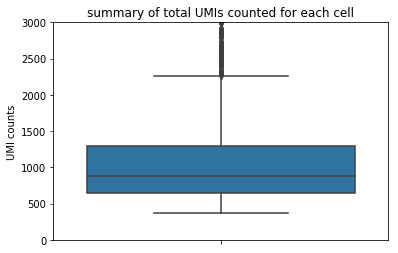

In [47]:
sns.boxplot(total_umis_detected.values, orient='v')
plt.ylabel("UMI counts")
plt.title("summary of total UMIs counted for each cell")
plt.ylim([0,3000])

(0, 3000)

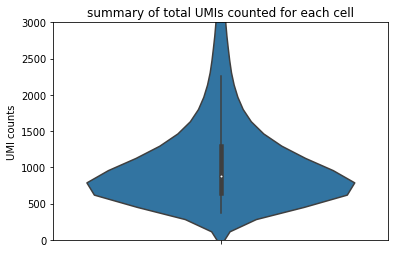

In [48]:
sns.violinplot(total_umis_detected.values, orient='v')
plt.ylabel("UMI counts")
plt.title("summary of total UMIs counted for each cell")
plt.ylim([0,3000])

(0, 3000)

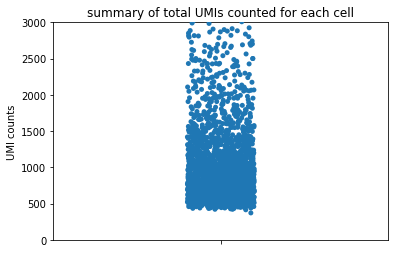

In [51]:
sns.stripplot(total_umis_detected.values, orient='v', jitter=True)
plt.ylabel("UMI counts")
plt.title("summary of total UMIs counted for each cell")
plt.ylim([0,3000])

In [52]:
min(total_umis_detected.values)

371